# LOCATION!!!!   LOCATION!!!!    LOCATION!!!!! 
## A Multivariate Regression Analysis of the King County, Washington Real Estate Market

![](https://upload.wikimedia.org/wikipedia/commons/a/a8/SeattleSkylineFromKerryPark.jpg)

## Business Understanding

For this project, my firm was retained by a well established smaller mid-sized local real estate broker ('Client') from the King County region of Washington State, with offices located atop of historic Queen Anne 'hill' and overlooking lower South Lake Union. Client has a large staff of seasoned real estate profesionals, including agents, loan officers, lead generation experts, and other sales supply chain specialists ('Team'). Recently, Client has become aware of how its competitors have been leveraging the abundance of real estate data available about the King County market in order to gain competitive advantages.  Client has approached firm to gain similar benefits.  
After a discussion with Client regarding the goals, Client has expressed a desire to **confirm, supplement and/or supplant** its experienced Team's preconceived notions about what truly drives residential real estate sales in King County.  Toward this end, Client surveyed its Team for their perspective on what primary factors Team believes directly drive real estate sale `price` and then submitted a list of responses to the firm. 

Based on the fact that Client seeks to understand the nature of the relationship between a continuous dependent variable, the `price` of real estate, and a multiple number of predictors, we recommended a multivariate regression analysis.  Client agreed to this initial statement of work. Client was advised and acknowledged that this analysis may ultimately lead to more questions that require additional steps in the future.    

![](https://upload.wikimedia.org/wikipedia/commons/e/ee/Queen-anne-houses.jpg)

## Summary

Even at this stage of the analysis, though flawed and incomplete, this report highlights the need for Client to prioritize location of residential real estate as maybe the most important predictor in a home's sale `price` in King County. In addition, while at first glance, `sqft_living` seems to be an important determinant, the removal of `sqft_living` and the log transformation of `sqft_lot` produced a model with nearly 120 statistically significant independent variables that we can say with 95 percent confidence is likely to be truly linear.  

##  I.  Data Understanding and Methods

### A.  Purpose

The goal for this analysis was to provide Client with actionable insights regarding the most important independent factors impacting residential real estate `price` in King County in an attempt to confirm its Team's fundamental understanding of the market. Given the number of different variables Client has requested we consider, a statistical multivariate regression analysis seems necessary to discern how these factors all impact price.  

### B.  Data

- **Records and Variables**

    The scope of this analysis was limited to records of homes sold between 06-10-2021 and 06-09-2022.  Each record or ('row') in the data represents a home with a listed `price` determined by its most recent sale within the aforementioned time period.  Each column, except for the dependent variable `price`, represents an independent variable.  


- **Base Data Source**

    Based on **survey responses and other direct input from Team**, Client provided a list of independent variables hypothesized to be the most successful predictors for the `price` of residential homes in King County, without any ranking or grouping.  From that list, fields were populated from data available to the public on the [King County Assessor Data Download page](https://info.kingcounty.gov/assessor/DataDownload/default.aspx).('Baseline Data') A full index of the factors ('columns'), including the target variable `price`, are located [here](http://localhost:8888/edit/data/column_names.md). 
    
    Notably, one of the survey responses by Client's team was ambiguously labeled "location".  As such, data in the `address`, `lat`, and `long` fields were retrieved using a third-party [geocoding API](https://docs.mapbox.com/api/search/geocoding/). 


- **Additional Data Source**

    Signifant data exploration outside the Baseline Dataset was performed in an attempt to provide the model more diverse and useful information.  Ulitimately, the analysis utilized additional data obtained through the [King County GIS Open Data Site](https://data.kingcounty.gov/County-Operations/King-County-GIS-Open-Data-site/wuuf-xywg) regarding geographic points of interest.   

### C.   Methodology

Given the 

The guiding principal underlying this analysis was the establishment of a Bayesian style iterative update process, beginning with an initial baseline multivariate linear regression model utilizing only the preprocessed Baseline Data.  From there, additional models were constructed by continuously incorporating new information, through both feature engineering and the use of additional data sources, while simultaneously maintaining, as much as possible, the fundamental assumptions of linear regression.  

##### Measurements


1. R-squared

    All models were evaluated using an adjusted R-squared metric, a version of the popular closed form method of ordinary least squares.  The adjusted R-squared method is a relative metric that calculates the proportion of explained variance, while also taking into account the multivariate nature of the model.  


2. F-statistic and statistical significance

    All features used in the model were ultimately validated using a traditional ANOVA based test for statistical signficance.


3. Mean Absolute Errors

    Model performance was checked by direct error based metrics, including a calculation of the Mean Absolute Error('MAE').  MAE is a calculation of the average distance of total errors in the model regardless of whether they are positive or negative. 


4. Root Mean Squared Error 

    Another error based metric used in this report was the Root Mean Squared Error - a calculation that takes the squared value of each individual error, sums them, and then takes square root of the total.  This metric is important because it gives errors greater weight based on their relative magnitude.  


5. The Rainbow test was employed as a measure of linearity.  
    

6. The Omnibus and Jacques Barre tests were used to meansure the model for normality.  

##### Iterative Procedures

Using the [CRISP](http://localhost:8888/view/data/Capstone%20Project%20Introduction%20-%20AWS-DA.png) method as a guideline, Baseline Data was first collected, preprocessed and modeled, using only numerical data ('Baseline Model'). A lengthy data exploration process was then undertaken that involved numerious iterations and process permutations with constant remodeling and testing.  

This includes but was not limited to the following iterative processes:

    -Visualization of relationships between independent variables and the target variable. 
    -Feature engineering, sometimes using additional data pulled in from numerous other resources. 
    -Outliers were removed from numerical distributions and categorical data was label encoded.  
    -Metrics from new models were measured against the Baseline Model and other model iterations 
    -Independent variables were tested for multicollinearity and removed if found to improve model performance. 
    -Residuals were visualized and examined for linearity, normality and homoskedacity.  

##### Data Transformations

Ultimately, tests for normality and linearity continued to fail despite attempts to clean and remodel the data. Due the hyperbolic distribution of `price` and the peculiar distribution of `sqft_lot`, those variables were selected for log transformations. The log transformation successfully provided a final model that was linear.   


## II. Data Preparation

##### Loading the Data and Programming tools

In [1152]:
#importing all appropriate Pythonic libraries and packages 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [1153]:
# reading in the King County dataset to Pandas
df = pd.read_csv('data/kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


##### preprocessing data

In [1154]:
# dropping the placeholder column
df.drop(labels='id', axis=1, inplace=True)

In [1155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30155 non-null  object 
 1   price          30155 non-null  float64
 2   bedrooms       30155 non-null  int64  
 3   bathrooms      30155 non-null  float64
 4   sqft_living    30155 non-null  int64  
 5   sqft_lot       30155 non-null  int64  
 6   floors         30155 non-null  float64
 7   waterfront     30155 non-null  object 
 8   greenbelt      30155 non-null  object 
 9   nuisance       30155 non-null  object 
 10  view           30155 non-null  object 
 11  condition      30155 non-null  object 
 12  grade          30155 non-null  object 
 13  heat_source    30123 non-null  object 
 14  sewer_system   30141 non-null  object 
 15  sqft_above     30155 non-null  int64  
 16  sqft_basement  30155 non-null  int64  
 17  sqft_garage    30155 non-null  int64  
 18  sqft_p

In [1156]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [1157]:
# converting all dates to datetime
df['date'] = pd.to_datetime(df['date'])

# renaming date to selldate
rnmdate = {'date':'selldate'}
df.rename(columns=rnmdate, inplace=True)

In [1158]:
# identifying missing values 
df.isna().sum()/df.shape[0]

selldate         0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
nuisance         0.000000
view             0.000000
condition        0.000000
grade            0.000000
heat_source      0.001061
sewer_system     0.000464
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
lat              0.000000
long             0.000000
dtype: float64

In [1159]:
# remove missing values in columns
df.dropna(subset=['heat_source', 'sewer_system'], axis=0, inplace=True)

### Data Exploration

##### Target distribution

First we will look at the `price` distribution. 

<AxesSubplot:xlabel='price', ylabel='Density'>

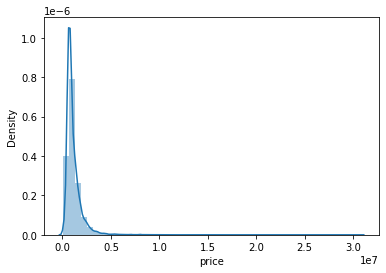

In [1160]:
sns.distplot(df['price'])

In [1161]:
df.corr()['price']

price            1.000000
bedrooms         0.288954
bathrooms        0.480337
sqft_living      0.608616
sqft_lot         0.086550
floors           0.180589
sqft_above       0.538631
sqft_basement    0.245005
sqft_garage      0.263674
sqft_patio       0.313789
yr_built         0.095796
yr_renovated     0.085023
lat              0.063430
long            -0.022278
Name: price, dtype: float64

Price is the singular dependent variable in our model. The distribution of price is heavily skewed to the right.  After creating a baseline, we will work on the outliers. 

## Construction of a Baseline Model

In [1162]:
# Creating categorical variables
cats = df[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'grade', 'lat', 'long']]
cats1 = df[['price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'grade', 'selldate', 'lat', 'long']]

In [1163]:
pred_cols = [x for x in df.columns if x not in cats1]

In [1164]:
# pred_cols2 = [x for x in df.columns if x not in cats2]

In [1165]:
pred_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated']

In [1166]:
# create baseline model
preds = df[pred_cols]
target = df['price']

In [1167]:
y = target
X = preds
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

In [1168]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     1922.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:02:27   Log-Likelihood:            -4.4743e+05
No. Observations:               30111   AIC:                         8.949e+05
Df Residuals:                   30099   BIC:                         8.950e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.134e+06   3.57e+05     17.200      0.000    5.43e+06    6.83e+06
bedrooms      -1.687e+05   5471.016    -30.833      0.000   -1.79e+05   -1.58e+05
bathrooms      1.382e+05   8071.916     17.117      0.000    1.22e+05    1.54e+05
sqft_living     333.5127     18.331     18.194      0.000     297.583     369.442
sqft_lot         -0.0954      0.068     -1.406      0.160      -0.229       0.038
floors          960.9160   9735.692      0.099      0.921   -1.81e+04       2e+04
sqft_above      288.2147     18.684     15.426      0.000     251.594     324.835
sqft_basement   168.3821     13.720     12.273      0.000     141.491     195.273
sqft_garage    -156.1730     19.057     -8.195      0.000    -193.526    -118.820
sqft_patio      269.0695     17.960     14.981      0.000     233.866     304.273
yr_built      -3083.0076    184.728    -16.689      0.000   -3445.082   -2720.933
yr_renovated     50.9701     10.048      5.073      0.000      31.276      70.664
==============================================================================
Omnibus:                    43058.776   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47624461.853
Skew:                           8.058   Prob(JB):                         0.00
Kurtosis:                     197.163   Cond. No.                     5.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1169]:
baseline_mae = mean_absolute_error(y, results.predict(sm.add_constant(X)))
baseline_mae

381082.48566328426

In [1170]:
mean_squared_error(y, results.predict(sm.add_constant(X)), squared=False)

687128.0861833282

##### Interpretation
This baseline model ('Baseline Model') is limited to both relevant discrete and continuous numeric predictors.  Based on the Mean Absolute Error ('MAE') calculation, overall this baseline model is off by about an average of 381,082.49 dollars for any given prediction.  Nevertheless, when evaluating the Root Mean Squared Error ('RMSE'), that approximation is approaching almost double, at about 687,128.09 dollars off any given prediction.  

The model is statistically significant overall and explains just about 41.2 percent of the variance in `price`. 

The coefficients for the intercept and all variables, except for `sqft_lot` and `floors`, are statistically significant.  

Our intercept is about 6,337,000, meaning that a home where all our baseline values were zero, would cost about 6.3 million dollars.

- Our coefficient for `Bathrooms` is about 130,000 meaning that for each additional 1 bathroom unit, the price of the home should increase by about 130,000 dollars. 

- Our bedrooms are negatively correlated at -168,700 meaning that for each decrease in 1 bedroom unit, the price of the home should **decrease** by 168,700 dollars.  

For each of the following, we can interpret the coefficient value to mean the following: for each additional square foot of (variable), the price goes up by the amount of the coefficient, in dollars.  For example, in the case of `sqft_living`, the coefficient for `sqft_living` is 333.5127. Therefore:

- For each additional square foot of living space, we expect the price to increase about 333.51 dollars.

- For each additional square foot of above ground living space (`sqft_above`), the price increases by about 295 dollars. 

- For each additional square foot of basement space, the price increases by about 168.38 dollars. 

- For each additional square foot of patio space, the price increases by about 269 dollars.

- For each additional square foot of garage space, the price **decreases** by about 156.17 dollars. 

In addition, for each increase in the year the home was built, there should be a decrease in about 3083 dollars, while each increase in the year a home was renovated should increase the price of the home by about 50 dollars.   
 
##### ANALYSIS
None of these figures are very helpful, and a huge amount of variance is unexplained by our baseline model.  The RMSE suggests that residuals from outliers are massively impacting the model.  Construction of usable geographic location features will help greatly.  

## Engineering Geographic features
Perhaps the most important confirmation from this analysis is that **location of a home is huge piece of the puzzle** when trying to understand what factors impact `price`.  Significant time was invested exploring outside data sources and engineering the most effective geographic location features for our model. 

##### Neighborhood 
Initially, a feature called `neighborhood` was constructed from data scraped from a website called [ZipDataMaps](https://www.zipdatamaps.com/king-wa-county-zipcodes) and resulted in exceptional model performance over the baseline model.  This increased model performance to about 64 percent R-squared ('explained variance).  

##### City 
When data was scraped from a website called [hometownlocator]('https://washington.hometownlocator.com/zip-codes/countyzips,scfips,53033,c,king.cfm') we were able to construct a `City` feature by filtering our `address` column for various City names.  After the City column was dummied out, model performance jumped even more, yielding an R-squared of about 68 percent of explained variance. 

##### Zipcode
Ultimately, the most effective iteration with a geographic predictor for `price` was the construction of a `Zipcode` feature engineered using the `address` variable.  

Notably, due to issues of multicolinearity, attempts made to use any of the above features in the same model together caused a significant increase in errors while causing performance to decrease.  

### Construction of `Zipcode` variable

In [1171]:
# isolating the zip code 
# alternative methods to achieve same
# df['Zipcode'] = df['address'].str.extract(r'(\d{5}\-?\d{0,4})')
# df['address'][0].split(',')[2][-5:]
# df['address'][1000][-20:-15]

df['Zipcode'] = df['address'].apply(lambda x: x[-20:-15])
df['Zipcode'] = df['Zipcode'].astype(int)

The engineering of the zipcode feature also provided an easy opportunity to clean outliers in the `address` variable.  As noted [here](http://localhost:8888/edit/data/column_names.md), due to missing or incorrectly-entered data from the King County Assessor, results from geocoding returned locations outside of King County, WA. From research performed above, the proper range of parameters for `Zipcode` were obtained.   

In [1172]:
# controling for outliers in zipcode preprocessing
df = df.loc[(df['Zipcode'].astype(int) > 98000) & (df['Zipcode'].astype(int) <= 98922)]

df.Zipcode.nunique()

88

<AxesSubplot:>

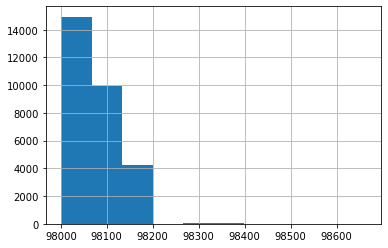

In [1173]:
df['Zipcode'].hist()

## Constructing Distances to Geographic Points of Interest

The addition of several points of interest to the model proved to be somewhat effective in improving model performance. Using a python package called Geopy, distances between geographic points and the locations of individual homes could be calculated using their `lat` and `long` figures. The trick became finding several points of interest that were not too interrelated with eachother to create multicolinearity issues.  Attempts to do this same process were unsucessful with other packages such as Plotly and GeoPandas.  


From the [King County GIS Open Data Site](https://data.kingcounty.gov/County-Operations/King-County-GIS-Open-Data-site/wuuf-xywg), a dataset containing about 5000 records of different geographic locations was downloaded, including their `lat` and `long`.  Fortunately, there was no need to merge or join the data with the base dataset. Instead we created a mask to filter our own dataset and create distances.  We chose three points of interest, though additional points could have been obtained and possibly more helpful.  Further research in this area would be advised.   

In [1174]:
# reading in the Points of Interest dataset to Pandas
df_dem = pd.read_csv('data/Points_of_Interest.csv')
df_dem

,X,Y,OBJECTID,FEATURE_ID,ESITE,CODE,NAME,ABB_NAME,ADDRESS,ZIPCODE
0,-122.067101,47.465386,1,10000032,5733.0,66,Station 79,79,20505 SE 152nd St,98059.0
1,-122.313910,47.552302,2,905,490884.0,664,Cleveland STEM High School,Cleveland,5511 15th Ave S,98108.0
2,-122.195782,47.657500,3,6600168,35858.0,663,Northwest University,NW University,5520 108th Ave NE,98033.0
3,-122.264083,47.319432,4,7,33.0,660,Evergreen Heights Elementary School,Evergreen Heights,5602 S 316th St,98001.0
4,-122.261359,47.333845,5,6600283,692199.0,660,Meredith Hill Elementary School,Hill,5830 S 300th St,98001.0
...,...,...,...,...,...,...,...,...,...,...
5632,-122.234595,47.381758,5633,10001602,898062.0,695,Public Halal Market,Public Halal Market,225 W MEEKER ST,98032.0
5633,-122.296801,47.415187,5634,10001603,391412.0,695,SeaTac International Market& Deli,SeaTac International Market& Deli,20804 INTERNATIONAL BLVD,98198.0
5634,-122.297787,47.407385,5635,10001604,758056.0,695,Madina Halal Market,Madina Halal Market,21630 PACIFIC HWY S,98198.0
5635,-122.177136,47.706192,5636,10001605,36305.0,695,Sahand,Sahand,12047 124TH AVE NE,98034.0


In [1175]:
# code for business districts
df_dem['CODE'].nunique()

50

In [1176]:
# dropping unnecessary columns
df_dem.drop(labels=['OBJECTID','FEATURE_ID', 'ESITE', 'ABB_NAME', 'ADDRESS', 'ZIPCODE'], axis=1, inplace=True)

In [1177]:
import geopy.distance

In [1178]:
rename_long = {'X': 'long'}
rename_lat = {'Y': 'lat'}


In [1179]:
df_dem.rename(columns=rename_long, inplace=True)
df_dem.rename(columns=rename_lat, inplace=True)

In [1180]:
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5637 entries, 0 to 5636
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   long    5637 non-null   float64
 1   lat     5637 non-null   float64
 2   CODE    5637 non-null   int64  
 3   NAME    5637 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 176.3+ KB


In [1181]:
df_dem.isna().sum()/df_dem.shape[0]

long    0.0
lat     0.0
CODE    0.0
NAME    0.0
dtype: float64

##### Creating a coordinate for all homes from `Lat` and `Long`

In [1182]:
#creates a tuple of both lat and long coordinates
house_coord = np.array(list(zip(df.lat, df.long)))

##### Distances of homes to the Nearest Business District

In [1183]:
business = df_dem.loc[df_dem['CODE'] == 420]

In [1184]:
df_loc = list(zip(business.lat, business.long))  #tuple of all #420 code coordinates

closest = []

for houseloc in house_coord:    #loops over every home by coordinate
    sortlist = []               #list to store distance calculations
    for hosploc in df_loc:      #loops through all business districts by coordinate every time it loops a house
        sortlist.append(geopy.distance.great_circle(houseloc, hosploc).miles) #geopy calculates in miles the distance
    closest.append(min(sortlist)) #saves the closest distance for each home to a business district

df['business_center'] = closest

In [1185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   selldate         29200 non-null  datetime64[ns]
 1   price            29200 non-null  float64       
 2   bedrooms         29200 non-null  int64         
 3   bathrooms        29200 non-null  float64       
 4   sqft_living      29200 non-null  int64         
 5   sqft_lot         29200 non-null  int64         
 6   floors           29200 non-null  float64       
 7   waterfront       29200 non-null  object        
 8   greenbelt        29200 non-null  object        
 9   nuisance         29200 non-null  object        
 10  view             29200 non-null  object        
 11  condition        29200 non-null  object        
 12  grade            29200 non-null  object        
 13  heat_source      29200 non-null  object        
 14  sewer_system     29200 non-null  objec

##### Distances of homes to med clinics (not hospitals or medical practices)

In [1186]:
# creates a clinic 
clinic = df_dem.loc[df_dem['CODE'] == 340] 

In [1187]:
df_loc = list(zip(clinic.lat, clinic.long))

closest = []

for houseloc in house_coord:
    sortlist = []
    for loc in df_loc:
        sortlist.append(geopy.distance.great_circle(houseloc, loc).miles)
    closest.append(min(sortlist))

df['clinic'] = closest

##### Distance to elementary schools

In [1188]:
elementary_schools = df_dem.loc[df_dem['CODE'] == 660]

In [1189]:
# this one takes a moment or two, so just hang tight
df_loc = list(zip(elementary_schools.lat, elementary_schools.long))

closest = []

for houseloc in house_coord:
    sortlist = []
    for loc in df_loc:
        sortlist.append(geopy.distance.great_circle(houseloc, loc).miles)
    closest.append(min(sortlist))

df['closest_elem_schools'] = closest

## Modeling - Improving upon the baseline model

In [1191]:
cat_cols = cats.columns    # creating dummified columns to make categories numerical
dum_df = pd.get_dummies(data=df, columns=cat_cols, drop_first=True)

In [1192]:
X1=dum_df.drop(labels=['selldate', 'price', 'address', 
                       'sewer_system_PUBLIC RESTRICTED', 'bedrooms', 
                      'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
                       'grade_2 Substandard', 'heat_source_Electricity/Solar'], axis=1)

In [1193]:
y=dum_df.price

In [1194]:
model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     511.1
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:05:13   Log-Likelihood:            -4.2449e+05
No. Observations:               29200   AIC:                         8.492e+05
Df Residuals:                   29072   BIC:                         8.503e+05
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -1.843e+08   2.18e+07     -8.438      0.000   -2.27e+08   -1.42e+08
bathrooms                         3.92e+04   5932.536      6.607      0.000    2.76e+04    5.08e+04
sqft_living                        78.5072     13.625      5.762      0.000      51.802     105.212
sqft_lot                            0.6007      0.054     11.174      0.000       0.495       0.706
floors                          -9.228e+04   8505.429    -10.850      0.000   -1.09e+05   -7.56e+04
sqft_above                        242.2553     14.078     17.209      0.000     214.663     269.848
sqft_basement                      75.6594     10.588      7.146      0.000      54.906      96.413
sqft_garage                        -9.9772     15.244     -0.654      0.513     -39.856      19.902
sqft_patio                         76.1971     13.751      5.541      0.000      49.245     103.150
yr_built                          678.6603    167.127      4.061      0.000     351.083    1006.238
yr_renovated                       58.4958      7.572      7.725      0.000      43.654      73.338
lat                              4.655e+05   1.76e+05      2.645      0.008    1.21e+05    8.11e+05
long                             -1.32e+06   1.73e+05     -7.627      0.000   -1.66e+06   -9.81e+05
business_center                 -1.922e+04   3775.326     -5.092      0.000   -2.66e+04   -1.18e+04
clinic                           2.175e+04   3706.439      5.868      0.000    1.45e+04     2.9e+04
closest_elem_schools            -2.595e+04   8010.431     -3.240      0.001   -4.17e+04   -1.02e+04
waterfront_YES                   7.796e+05   2.73e+04     28.597      0.000    7.26e+05    8.33e+05
greenbelt_YES                    4006.7554   1.92e+04      0.209      0.834   -3.35e+04    4.15e+04
nuisance_YES                    -5.344e+04   8065.834     -6.626      0.000   -6.93e+04   -3.76e+04
view_EXCELLENT                   7.178e+05   2.75e+04     26.114      0.000    6.64e+05    7.72e+05
view_FAIR                        9.893e+04   3.62e+04      2.733      0.006     2.8e+04     1.7e+05
view_GOOD                        7.166e+04   2.07e+04      3.465      0.001    3.11e+04    1.12e+05
view_NONE                        -9.26e+04   1.26e+04     -7.367      0.000   -1.17e+05    -6.8e+04
condition_Fair                  -1.356e+05   3.41e+04     -3.972      0.000   -2.03e+05   -6.87e+04
condition_Good                   5.599e+04   7531.184      7.435      0.000    4.12e+04    7.08e+04
condition_Poor                  -4.245e+04   6.62e+04     -0.641      0.521   -1.72e+05    8.73e+04
condition_Very Good              1.194e+05   1.05e+04     11.322      0.000    9.87e+04     1.4e+05
heat_source_Gas                  1.451e+04   7173.747      2.022      0.043     444

In [1195]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

242026.81709502763

In [1196]:
mean_squared_error(y, results1.predict(sm.add_constant(X1)), squared=False)

498022.5591922783

##### Interpretation
This first model iteration ('Model1'), is the product of significant experimentation, but it demonstrates the impact of geographic factors and the dummying out of categorical variables alone.  The performance of Model1 is significantly better than the Baseline Model. The adjusted R-squared increased from 41.3 percent of variance explained to approximately 69 percent, while the MAE dropped to 242026.81 from 381082.49. This means that for each prediction, we are off by about an average of 242026.81 dollars.  

On the other hand, the RMSE only dropped to 498022.56, down from 687128.09.  The less proportionate decrease in the RMSE means there are still outliers with errors of greater magnitude that are impacting the models performance.     

### Other categorical variables

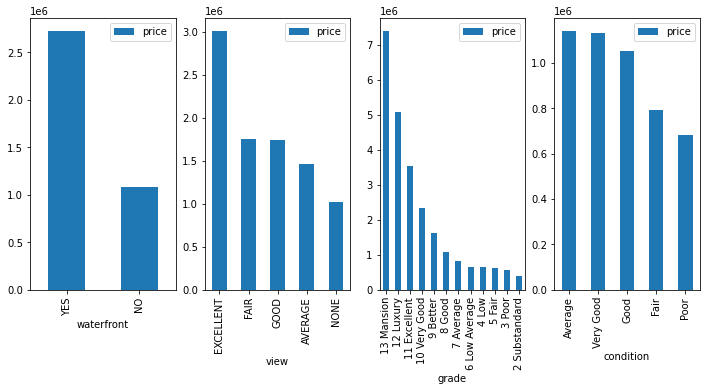

In [1121]:
cats2 = ['waterfront', 'view', 'grade', 'condition']
fig, axes = plt.subplots(ncols=len(cats2), figsize=(12,5))
for index, feature in enumerate(cats2):
    df.groupby(feature).mean().sort_values(by='price', ascending=False).plot.bar(
        y='price', ax=axes[index])


While our analysis focused on the geographic categories, other categories deserve further analysis in the future, especially grade.  Waterfront, would be a good candidate for an interaction term.  

[section_1](#section_1)
[section_3](#section_3)   

## First Model residual/linearity evaluation

Text(0.5, 1.0, 'Linear Relationship Residual Plot')

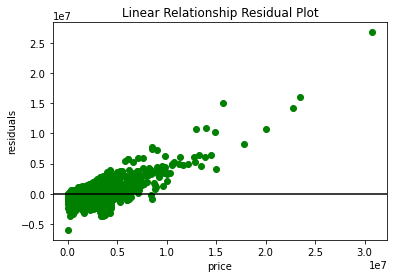

In [1198]:
fig, ax = plt.subplots()
ax.scatter(y, results1.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("price")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot")

Outliers are having a huge effect on Model1, as seen by the scattered residuals. 

## Rainbow test

In [1199]:
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(results1)


(1.3513769662157056, 1.2060256380290299e-73)

When performing a rainbow test, our null hypothesis is that there is no significant difference between the subset model and the full model - meaning the relationship is in fact linear.  Because the rainbow test yields a result that falls below .05 we must fail to reject the null hypothesis in Model1, and consider the likelihood that there are significant factors impacting the target in Model1 where the relationship is non-linear. 

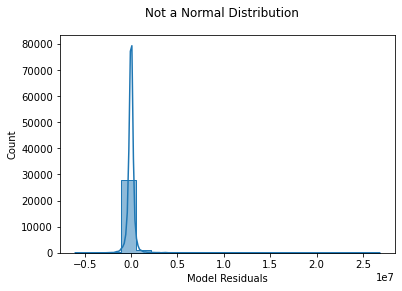

In [1201]:
fig, ax = plt.subplots()
sns.histplot(results1.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("Not a Normal Distribution");

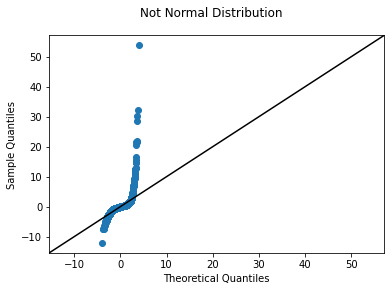

In [1203]:
fig, ax = plt.subplots()
sm.graphics.qqplot(results1.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
line = ax.lines[1]
line.set_color("black")
fig.suptitle("Not Normal Distribution");

## Handling Outliers
Outliers have the second most significant impact on our model, besides location.  The best results were obtained by removing all outliers outside three standard deviations, and then repeating the process a second time. Doing so lightens the tails and normalizes the distribution just enough to bring errors down significantly while increasing overall model performance.  Beyond two iterations of this process, the laws of marginal utility seem to drastically come into play, because there is virtually no effect.   

##### Cleaning price 1

Cleaning price has a significant impact.  

(array([2.8412e+04, 6.7600e+02, 7.9000e+01, 1.7000e+01, 1.0000e+01,
        2.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.7360000e+04, 3.0996240e+06, 6.1718880e+06, 9.2441520e+06,
        1.2316416e+07, 1.5388680e+07, 1.8460944e+07, 2.1533208e+07,
        2.4605472e+07, 2.7677736e+07, 3.0750000e+07]),
 <BarContainer object of 10 artists>)

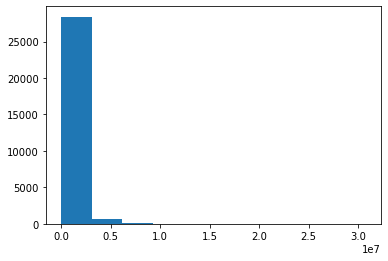

In [1204]:
plt.hist(df['price'])

##### 1st time

In [1205]:
# removes all outliers outside three standard deviations
upper_limit = df['price'].mean() + 3*df['price'].std()
lower_limit = df['price'].mean() - 3*df['price'].std()
df['price'] = np.where(df['price'] > upper_limit, upper_limit,
np.where(df['price'] < lower_limit, lower_limit, df['price']))

upper_limit = df['floors'].mean() + 3*df['floors'].std()
lower_limit = df['floors'].mean() - 3*df['floors'].std()
df['floors'] = np.where(df['floors'] > upper_limit, upper_limit,
np.where(df['floors'] < lower_limit, lower_limit, df['floors']))

upper_limit = df['sqft_garage'].mean() + 3*df['sqft_garage'].std()
lower_limit = df['sqft_garage'].mean() - 3*df['sqft_garage'].std()

df['sqft_garage'] = np.where(df['sqft_garage'] > upper_limit, upper_limit,
    np.where(df['sqft_garage'] < lower_limit, lower_limit, df['sqft_garage']))

upper_limit = df['sqft_basement'].mean() + 3*df['sqft_basement'].std()
lower_limit = df['sqft_basement'].mean() - 3*df['sqft_basement'].std()

df['sqft_basement'] = np.where(df['sqft_basement'] > upper_limit, upper_limit,
    np.where(df['sqft_basement'] < lower_limit, lower_limit, df['sqft_basement']))

upper_limit = df['sqft_patio'].mean() + 3*df['sqft_patio'].std()
lower_limit = df['sqft_patio'].mean() - 3*df['sqft_patio'].std()

df['sqft_patio'] = np.where(df['sqft_patio'] > upper_limit, upper_limit,
    np.where(df['sqft_patio'] < lower_limit, lower_limit, df['sqft_patio']))

upper_limit = df['bedrooms'].mean() + 3*df['bedrooms'].std()
lower_limit = df['bedrooms'].mean() - 3*df['bedrooms'].std()
df['bedrooms'] = np.where(df['bedrooms'] > upper_limit, upper_limit,
np.where(df['bedrooms'] < lower_limit, lower_limit, df['bedrooms']))

upper_limit = df['bathrooms'].mean() + 3*df['bathrooms'].std()
lower_limit = df['bathrooms'].mean() - 3*df['bathrooms'].std()

df['bathrooms'] = np.where(df['bathrooms'] > upper_limit, upper_limit,
    np.where(df['bathrooms'] < lower_limit, lower_limit, df['bathrooms']))

upper_limit = df['sqft_above'].mean() + 3*df['sqft_above'].std()
lower_limit = df['sqft_above'].mean() - 3*df['sqft_above'].std()

df['sqft_above'] = np.where(df['sqft_above'] > upper_limit, upper_limit,
    np.where(df['sqft_above'] < lower_limit, lower_limit, df['sqft_above']))

upper_limit = df['sqft_lot'].mean() + 3*df['sqft_lot'].std()
lower_limit = df['sqft_lot'].mean() - 3*df['sqft_lot'].std()

df['sqft_lot'] = np.where(df['sqft_lot'] > upper_limit, upper_limit,
    np.where(df['sqft_lot'] < lower_limit, lower_limit, df['sqft_lot']))

(array([ 1205., 10772.,  7967.,  4053.,  2211.,  1056.,   716.,   402.,
          224.,   594.]),
 array([  27360.        ,  404560.60389017,  781761.20778034,
        1158961.8116705 , 1536162.41556067, 1913363.01945084,
        2290563.62334101, 2667764.22723118, 3044964.83112134,
        3422165.43501151, 3799366.03890168]),
 <BarContainer object of 10 artists>)

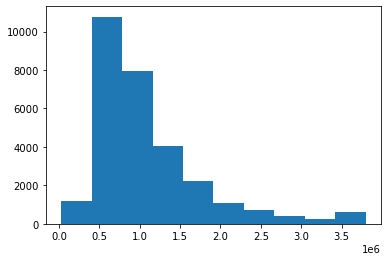

In [1206]:
plt.hist(df['price'])

##### 2nd time

In [1207]:
# removes all outliers outside three standard deviations
upper_limit = df['price'].mean() + 3*df['price'].std()
lower_limit = df['price'].mean() - 3*df['price'].std()
df['price'] = np.where(df['price'] > upper_limit, upper_limit,
np.where(df['price'] < lower_limit, lower_limit, df['price']))

upper_limit = df['floors'].mean() + 3*df['floors'].std()
lower_limit = df['floors'].mean() - 3*df['floors'].std()
df['floors'] = np.where(df['floors'] > upper_limit, upper_limit,
np.where(df['floors'] < lower_limit, lower_limit, df['floors']))

upper_limit = df['sqft_garage'].mean() + 3*df['sqft_garage'].std()
lower_limit = df['sqft_garage'].mean() - 3*df['sqft_garage'].std()

df['sqft_garage'] = np.where(df['sqft_garage'] > upper_limit, upper_limit,
    np.where(df['sqft_garage'] < lower_limit, lower_limit, df['sqft_garage']))

upper_limit = df['sqft_basement'].mean() + 3*df['sqft_basement'].std()
lower_limit = df['sqft_basement'].mean() - 3*df['sqft_basement'].std()

df['sqft_basement'] = np.where(df['sqft_basement'] > upper_limit, upper_limit,
    np.where(df['sqft_basement'] < lower_limit, lower_limit, df['sqft_basement']))

upper_limit = df['sqft_patio'].mean() + 3*df['sqft_patio'].std()
lower_limit = df['sqft_patio'].mean() - 3*df['sqft_patio'].std()

df['sqft_patio'] = np.where(df['sqft_patio'] > upper_limit, upper_limit,
    np.where(df['sqft_patio'] < lower_limit, lower_limit, df['sqft_patio']))

upper_limit = df['bedrooms'].mean() + 3*df['bedrooms'].std()
lower_limit = df['bedrooms'].mean() - 3*df['bedrooms'].std()
df['bedrooms'] = np.where(df['bedrooms'] > upper_limit, upper_limit,
np.where(df['bedrooms'] < lower_limit, lower_limit, df['bedrooms']))

upper_limit = df['bathrooms'].mean() + 3*df['bathrooms'].std()
lower_limit = df['bathrooms'].mean() - 3*df['bathrooms'].std()

df['bathrooms'] = np.where(df['bathrooms'] > upper_limit, upper_limit,
    np.where(df['bathrooms'] < lower_limit, lower_limit, df['bathrooms']))

upper_limit = df['sqft_above'].mean() + 3*df['sqft_above'].std()
lower_limit = df['sqft_above'].mean() - 3*df['sqft_above'].std()

df['sqft_above'] = np.where(df['sqft_above'] > upper_limit, upper_limit,
    np.where(df['sqft_above'] < lower_limit, lower_limit, df['sqft_above']))

upper_limit = df['sqft_lot'].mean() + 3*df['sqft_lot'].std()
lower_limit = df['sqft_lot'].mean() - 3*df['sqft_lot'].std()

df['sqft_lot'] = np.where(df['sqft_lot'] > upper_limit, upper_limit,
    np.where(df['sqft_lot'] < lower_limit, lower_limit, df['sqft_lot']))

(array([ 713., 6641., 9509., 4444., 2971., 1791.,  936.,  751.,  421.,
        1023.]),
 array([  27360.        ,  337715.99844757,  648071.99689515,
         958427.99534272, 1268783.9937903 , 1579139.99223787,
        1889495.99068545, 2199851.98913302, 2510207.9875806 ,
        2820563.98602817, 3130919.98447575]),
 <BarContainer object of 10 artists>)

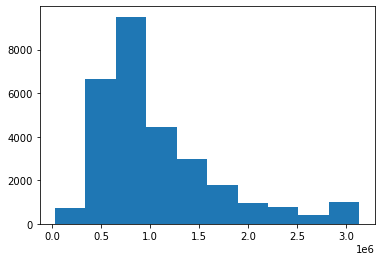

In [1208]:
plt.hist(df['price'])

In [1209]:
cat_cols = cats.columns    # creating dummified columns to make categories numerical
dum_df = pd.get_dummies(data=df, columns=cat_cols, drop_first=True)

X1=dum_df.drop(labels=['selldate', 'price', 'address', 
                       'sewer_system_PUBLIC RESTRICTED', 'bedrooms', 
                      'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
                       'grade_2 Substandard', 'heat_source_Electricity/Solar'], axis=1)

y=dum_df.price

model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     793.0
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:20:36   Log-Likelihood:            -4.0977e+05
No. Observations:               29200   AIC:                         8.198e+05
Df Residuals:                   29072   BIC:                         8.209e+05
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -9.526e+07   1.32e+07     -7.217      0.000   -1.21e+08   -6.94e+07
bathrooms                        3.794e+04   3676.375     10.320      0.000    3.07e+04    4.51e+04
sqft_living                        82.0196      7.089     11.570      0.000      68.124      95.915
sqft_lot                            2.7387      0.139     19.761      0.000       2.467       3.010
floors                          -5.924e+04   5213.026    -11.364      0.000   -6.95e+04    -4.9e+04
sqft_above                        184.9014      7.870     23.496      0.000     169.477     200.326
sqft_basement                      38.6381      5.984      6.457      0.000      26.909      50.367
sqft_garage                        17.2412      9.511      1.813      0.070      -1.401      35.883
sqft_patio                         23.3571      9.411      2.482      0.013       4.912      41.802
yr_built                         -165.1769    101.581     -1.626      0.104    -364.280      33.926
yr_renovated                       50.2327      4.573     10.984      0.000      41.269      59.197
lat                              3.747e+05   1.06e+05      3.520      0.000    1.66e+05    5.83e+05
long                            -6.405e+05   1.05e+05     -6.124      0.000   -8.45e+05   -4.36e+05
business_center                 -1.487e+04   2280.425     -6.522      0.000   -1.93e+04   -1.04e+04
clinic                           1.374e+04   2240.201      6.131      0.000    9344.569    1.81e+04
closest_elem_schools            -1.366e+04   4851.892     -2.815      0.005   -2.32e+04   -4146.167
waterfront_YES                   2.113e+05   1.65e+04     12.836      0.000    1.79e+05    2.44e+05
greenbelt_YES                    5.842e+04   1.16e+04      5.046      0.000    3.57e+04    8.11e+04
nuisance_YES                    -4.986e+04   4878.444    -10.220      0.000   -5.94e+04   -4.03e+04
view_EXCELLENT                   3.615e+05   1.66e+04     21.769      0.000    3.29e+05    3.94e+05
view_FAIR                        6.669e+04   2.19e+04      3.050      0.002    2.38e+04     1.1e+05
view_GOOD                        9.724e+04   1.25e+04      7.790      0.000    7.28e+04    1.22e+05
view_NONE                       -9.764e+04   7596.300    -12.854      0.000   -1.13e+05   -8.28e+04
condition_Fair                  -8.863e+04   2.06e+04     -4.296      0.000   -1.29e+05   -4.82e+04
condition_Good                   5.502e+04   4544.982     12.105      0.000    4.61e+04    6.39e+04
condition_Poor                  -8.956e+04      4e+04     -2.239      0.025   -1.68e+05   -1.11e+04
condition_Very Good              1.183e+05   6361.922     18.597      0.000    1.06e+05    1.31e+05
heat_source_Gas                    1.7e+04   4348.476      3.910      0.000    8480

In [1210]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

200450.81636636192

In [1211]:
mean_squared_error(y, results1.predict(sm.add_constant(X1)), squared=False)

300816.5514088276

##### Interpretation
Comparing this model ('model2') to Model1 or the Baseline Model, we can clearly see that removing the outliers has had a massive impact on the overall performance.  Once again, model2 is statistically signficant, like the Baseline Model and Model1.  However, now the adjusted R-squared calculation indicates that this model is explaining approximately 77.5 percent of the variance. 

Meanwhile, while our MAE only dropped from 242026.82 to 200450.82, our RMSE dropped from 498022.56 to 300816.55.  This means that the residuals in our outliers, which have an exponential impact on the performance of our model, have been greatly reduced. 

Based on our RMSE, any given prediction under Model2 should be off by about 300,816.55 dollars.  

Text(0.5, 1.0, 'Linear Relationship Residual Plot')

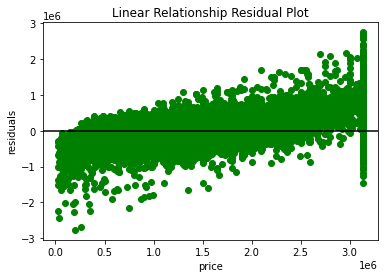

In [1213]:
## Model2 evaluation

fig, ax = plt.subplots()
ax.scatter(y, results1.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("price")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot")

The difference now in the residuals is huge from the residuals in Model1, as seen by the much more tightened up  residual plot. 

In [1214]:
## Rainbow test 2

from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(results1)

(1.0285260973770043, 0.044986001342760436)

Model2 is greatly improved but still not quite linear. Based on the above, we still cannot reject the null hypothesis. Again, because the rainbow test yields a result that falls below .05 we must fail to reject the null hypothesis in our model, and consider the likelihood that there are significant factors in our model that still have a non-linear relationship with `price`.

## Exploring the relationship between numerical columns and price

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


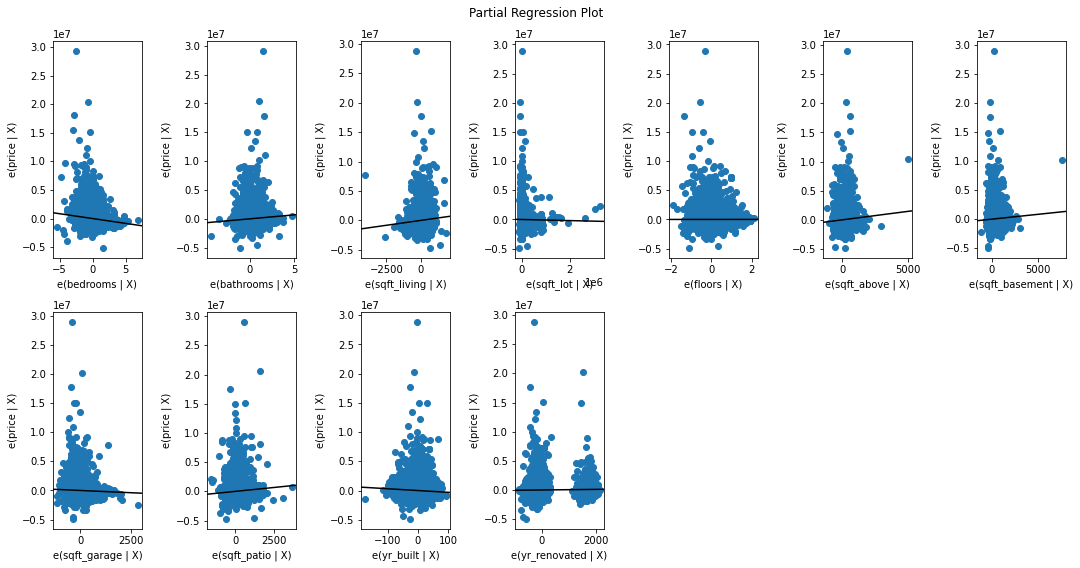

In [1219]:
# Performing partial regressions on numerical features
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    results, 
    exog_idx=list(X.columns),
    grid=(2,7),
    fig=fig)
plt.tight_layout()
plt.show();

In [1218]:
# plt.figure(figsize=(20,15))
# plt.subplot(1,2,1)
# sns.scatterplot(x='sqft_lot', y='price', data=df);

Few of these seemed to exhibit linear relationships with price, which begs the question of whether their relationship with `price` is truly linear.  For our final model, we will perform a log transformation of `sqft_lot`

## Log Transformation of `sqft_lot` 

In [1220]:
x_sqft_log = X1.copy()
x_sqft_log['log(sqft_lot)'] = np.log(x_sqft_log['sqft_lot'])
x_sqft_log[['sqft_lot', 'log(sqft_lot)']]

,sqft_lot,log(sqft_lot)
0,7140.0,8.873468
1,6703.0,8.810310
2,6156.0,8.725182
3,1400.0,7.244228
4,758.0,6.630683
...,...,...
30150,4000.0,8.294050
30151,5800.0,8.665613
30152,3600.0,8.188689
30153,2889.0,7.968666


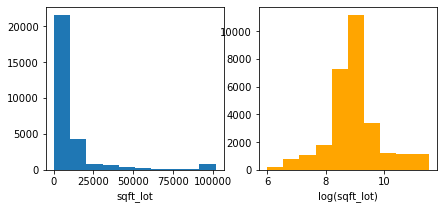

In [1221]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7,3))
ax1.hist(x_sqft_log['sqft_lot'])
ax1.set_xlabel("sqft_lot")
ax2.hist(x_sqft_log['log(sqft_lot)'], color = 'orange')
ax2.set_xlabel("log(sqft_lot)");

In [1222]:
x_sqft_log.drop('sqft_lot', axis=1, inplace=True)
x_sqft_log

,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,...,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,log(sqft_lot)
0,1.0,1180,1.0,1180.0,0.0,0.0,40.0,1969,0,47.461975,...,0,0,0,0,0,0,1,0,0,8.873468
1,2.5,2770,1.0,1570.0,1570.0,0.0,240.0,1950,0,47.711525,...,0,0,0,0,0,0,1,0,0,8.810310
2,2.0,2880,1.0,1580.0,1580.0,0.0,0.0,1956,0,47.502045,...,0,0,0,0,0,0,1,0,0,8.725182
3,3.0,2160,2.0,1090.0,1070.0,200.0,270.0,2010,0,47.566110,...,0,0,0,0,0,0,0,0,1,7.244228
4,2.0,1120,2.0,1120.0,550.0,550.0,30.0,2012,0,47.532470,...,0,0,0,0,0,0,1,0,0,6.630683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,2.0,1910,1.5,1600.0,1130.0,0.0,210.0,1921,0,47.664740,...,0,0,0,0,0,0,0,1,0,8.294050
30151,2.0,2020,2.0,2020.0,0.0,0.0,520.0,2011,0,47.565610,...,0,0,0,0,0,0,1,0,0,8.665613
30152,2.0,1620,1.0,940.0,920.0,240.0,110.0,1995,0,47.610395,...,0,0,0,0,0,0,1,0,0,8.188689
30153,2.5,2570,2.0,1830.0,740.0,480.0,100.0,2006,0,47.449490,...,0,0,0,0,0,0,0,1,0,7.968666


In [1223]:
sqft_log_model = sm.OLS(y, sm.add_constant(x_sqft_log))
sqft_log_results = sqft_log_model.fit()

sqft_log_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     808.4
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:34:24   Log-Likelihood:            -4.0955e+05
No. Observations:               29200   AIC:                         8.194e+05
Df Residuals:                   29072   BIC:                         8.204e+05
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            -1.02e+08   1.31e+07     -7.783      0.000   -1.28e+08   -7.63e+07
bathrooms                        3.795e+04   3648.157     10.404      0.000    3.08e+04    4.51e+04
sqft_living                        77.3938      7.040     10.994      0.000      63.596      91.192
floors                           -1.81e+04   5411.234     -3.345      0.001   -2.87e+04   -7496.472
sqft_above                        158.5023      7.886     20.098      0.000     143.044     173.960
sqft_basement                      40.1866      5.939      6.766      0.000      28.545      51.828
sqft_garage                        -8.8675      9.489     -0.935      0.350     -27.466       9.731
sqft_patio                          6.7851      9.373      0.724      0.469     -11.587      25.157
yr_built                          609.3783    105.589      5.771      0.000     402.419     816.338
yr_renovated                       54.8544      4.543     12.073      0.000      45.949      63.760
lat                              3.992e+05   1.06e+05      3.783      0.000    1.92e+05    6.06e+05
long                            -6.656e+05   1.04e+05     -6.414      0.000   -8.69e+05   -4.62e+05
business_center                 -1.795e+04   2267.326     -7.919      0.000   -2.24e+04   -1.35e+04
clinic                           1.298e+04   2223.467      5.836      0.000    8618.708    1.73e+04
closest_elem_schools            -1.181e+04   4791.285     -2.465      0.014   -2.12e+04   -2417.188
waterfront_YES                   1.973e+05   1.64e+04     12.063      0.000    1.65e+05    2.29e+05
greenbelt_YES                      5.9e+04   1.15e+04      5.136      0.000    3.65e+04    8.15e+04
nuisance_YES                    -5.089e+04   4839.427    -10.515      0.000   -6.04e+04   -4.14e+04
view_EXCELLENT                   3.574e+05   1.65e+04     21.691      0.000    3.25e+05     3.9e+05
view_FAIR                        6.524e+04   2.17e+04      3.006      0.003    2.27e+04    1.08e+05
view_GOOD                        9.767e+04   1.24e+04      7.883      0.000    7.34e+04    1.22e+05
view_NONE                       -9.092e+04   7545.435    -12.050      0.000   -1.06e+05   -7.61e+04
condition_Fair                  -9.887e+04   2.05e+04     -4.828      0.000   -1.39e+05   -5.87e+04
condition_Good                   5.289e+04   4511.197     11.724      0.000     4.4e+04    6.17e+04
condition_Poor                  -8.468e+04   3.97e+04     -2.133      0.033   -1.62e+05   -6861.784
condition_Very Good              1.189e+05   6313.955     18.831      0.000    1.07e+05    1.31e+05
heat_source_Gas                  1.762e+04   4308.512      4.090      0.000    9175.318    2.61e+04
heat_source_Gas/Solar            1.188e+05   3.14e+04      3.787      0.000    5.73

In [1224]:
baseline_mae = mean_absolute_error(y, sqft_log_results.predict(sm.add_constant(x_sqft_log)))
baseline_mae

198964.28742208626

In [1225]:
mean_absolute_error(y, sqft_log_results.predict(sm.add_constant(x_sqft_log)))

198964.28742208626

In [1226]:
mean_squared_error(y, sqft_log_results.predict(sm.add_constant(x_sqft_log)), squared=False)

298567.1730957318

In [1227]:
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(sqft_log_results)

(1.0262617725607606, 0.059062657574553555)

Log Transforming `sqft_lot` was extremely helpful in our final model ('Final Model') performance. Just looking at the errors or R-squared might not indicate much improvement; however, our model is finally linear.  

##### Final Model Analysis
The Final Model showed massive improvement over the Baseline Model, and was even a slight improvement over Model2 as the adjusted R-squared indicates that the explained variance rose from 77.5 to 77.8.    The constant is no longer statistically significant, so we need to adjust our figures to more accurately account for why that is happening.  We should next remove columns that are statistically significant.  

In [738]:
# def backward_regression(X1, y,
#                         initial_list=[], 
#                         threshold_in=0.01, 
#                         threshold_out = 0.05, 
#                         verbose=True):
#     included=list(X1.columns)
#     while True:
#         changed=False
#         model = sm.OLS(y, sm.add_constant(pd.DataFrame(X1[included]))).fit()
#         # use all coefs except intercept
#         pvalues = model.pvalues.iloc[1:]
#         worst_pval = pvalues.max() # null if pvalues is empty
#         if worst_pval > threshold_out:
#             changed=True
#             worst_feature = pvalues.idxmax()
#             included.remove(worst_feature)
#             if verbose:
#                 print(worst_feature, worst_pval)
#         if not changed:
#             break
#     return included

# (backward_regression(X1, y))

In [740]:
# Out = [x for x in X1.columns if x not in included]
# Out

In [741]:
# cats = df[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'grade', 'Zipcode']]
# cats1 = df[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'Zipcode', 'grade']]

In [743]:
# scaler = StandardScaler()

# X_scaled = pd.DataFrame(scaler.fit_transform(X1), columns=X1.columns)
# X_scaled.head()

# model_scaled = sm.OLS(y.values, sm.add_constant(X_scaled)).fit()
# model_scaled.summary()

# # X = sm.add_constant(X.values)
# # result = sm.OLS(Y.values, X).fit()

In [744]:
# X_log.

## Addressing Multicolinerity

In [745]:
X1.corr()

,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
bathrooms,1.000000,0.779815,0.038773,0.427303,0.680848,0.260830,0.461250,0.333334,0.455908,0.042586,...,0.214911,0.174422,0.116907,-0.026171,-0.058721,-0.154659,-0.358997,-0.283327,0.179712,0.265275
sqft_living,0.779815,1.000000,0.118651,0.355029,0.881737,0.336055,0.503694,0.405702,0.328501,0.035436,...,0.300620,0.241335,0.176439,-0.024320,-0.061080,-0.145082,-0.309025,-0.330247,0.087435,0.307405
sqft_lot,0.038773,0.118651,1.000000,-0.020730,0.128455,0.002419,0.084925,0.157229,0.012297,0.007709,...,0.048641,0.054337,0.022926,0.020682,0.034169,0.041449,0.004486,-0.053309,-0.026566,0.021360
floors,0.427303,0.355029,-0.020730,1.000000,0.504755,-0.243423,0.178852,0.123486,0.521465,-0.015708,...,0.078250,0.047319,0.023059,-0.014774,-0.035083,-0.090356,-0.240467,-0.325595,0.225686,0.276635
sqft_above,0.680848,0.881737,0.128455,0.504755,1.000000,-0.073602,0.553875,0.320638,0.427986,0.007160,...,0.283218,0.217424,0.159424,-0.021696,-0.053879,-0.124654,-0.276576,-0.357067,0.083347,0.324977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
grade_5 Fair,-0.154659,-0.145082,0.041449,-0.090356,-0.124654,-0.066472,-0.124889,-0.060278,-0.140424,-0.004451,...,-0.013657,-0.007487,-0.003315,-0.002030,-0.004591,1.000000,-0.038000,-0.093526,-0.076308,-0.043326
grade_6 Low Average,-0.358997,-0.309025,0.004486,-0.240467,-0.276576,-0.111648,-0.295954,-0.138792,-0.308337,0.014329,...,-0.038841,-0.021294,-0.009429,-0.005772,-0.013058,-0.038000,1.000000,-0.265996,-0.217025,-0.123222
grade_7 Average,-0.283327,-0.330247,-0.053309,-0.325595,-0.357067,0.024221,-0.193521,-0.172700,-0.270872,0.013296,...,-0.095597,-0.052409,-0.023206,-0.014207,-0.032140,-0.093526,-0.265996,1.000000,-0.534145,-0.303275
grade_8 Good,0.179712,0.087435,-0.026566,0.225686,0.083347,0.009581,0.112352,0.046224,0.252517,-0.020344,...,-0.077997,-0.042761,-0.018934,-0.011592,-0.026223,-0.076308,-0.217025,-0.534145,1.000000,-0.247441


In [746]:
abs(X1.corr()) > .75

,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
bathrooms,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,True,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
grade_5 Fair,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
grade_6 Low Average,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
grade_7 Average,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
grade_8 Good,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [1139]:
X2 = X1.corr().abs().stack().reset_index().sort_values(0, ascending=False)
X2['pairs'] = list(zip(X2.level_0, X2.level_1))
X2.set_index(['pairs'], inplace=True)
X2.drop(columns=['level_1', 'level_0'], inplace = True)
X2.columns = ['cc']
X2.drop_duplicates(inplace=True)
X2[(X2.cc>.75) & (X2.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.862328
"(bathrooms, sqft_living)",0.766619


In [748]:
X1.drop(columns=['sqft_living'], inplace=True)

In [537]:
X1.drop(columns=['sqft_garage'], inplace=True)

In [538]:
X1.drop(columns=['yr_built'], inplace=True)

In [1140]:
model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     793.0
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:52:56   Log-Likelihood:            -4.0977e+05
No. Observations:               29200   AIC:                         8.198e+05
Df Residuals:                   29072   BIC:                         8.209e+05
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -9.526e+07   1.32e+07     -7.217      0.000   -1.21e+08   -6.94e+07
bathrooms                        3.794e+04   3676.375     10.320      0.000    3.07e+04    4.51e+04
sqft_living                        82.0196      7.089     11.570      0.000      68.124      95.915
sqft_lot                            2.7387      0.139     19.761      0.000       2.467       3.010
floors                          -5.924e+04   5213.026    -11.364      0.000   -6.95e+04    -4.9e+04
sqft_above                        184.9014      7.870     23.496      0.000     169.477     200.326
sqft_basement                      38.6381      5.984      6.457      0.000      26.909      50.367
sqft_garage                        17.2412      9.511      1.813      0.070      -1.401      35.883
sqft_patio                         23.3571      9.411      2.482      0.013       4.912      41.802
yr_built                         -165.1769    101.581     -1.626      0.104    -364.280      33.926
yr_renovated                       50.2327      4.573     10.984      0.000      41.269      59.197
lat                              3.747e+05   1.06e+05      3.520      0.000    1.66e+05    5.83e+05
long                            -6.405e+05   1.05e+05     -6.124      0.000   -8.45e+05   -4.36e+05
business_center                 -1.487e+04   2280.425     -6.522      0.000   -1.93e+04   -1.04e+04
clinic                           1.374e+04   2240.201      6.131      0.000    9344.569    1.81e+04
closest_elem_schools            -1.366e+04   4851.892     -2.815      0.005   -2.32e+04   -4146.167
waterfront_YES                   2.113e+05   1.65e+04     12.836      0.000    1.79e+05    2.44e+05
greenbelt_YES                    5.842e+04   1.16e+04      5.046      0.000    3.57e+04    8.11e+04
nuisance_YES                    -4.986e+04   4878.444    -10.220      0.000   -5.94e+04   -4.03e+04
view_EXCELLENT                   3.615e+05   1.66e+04     21.769      0.000    3.29e+05    3.94e+05
view_FAIR                        6.669e+04   2.19e+04      3.050      0.002    2.38e+04     1.1e+05
view_GOOD                        9.724e+04   1.25e+04      7.790      0.000    7.28e+04    1.22e+05
view_NONE                       -9.764e+04   7596.300    -12.854      0.000   -1.13e+05   -8.28e+04
condition_Fair                  -8.863e+04   2.06e+04     -4.296      0.000   -1.29e+05   -4.82e+04
condition_Good                   5.502e+04   4544.982     12.105      0.000    4.61e+04    6.39e+04
condition_Poor                  -8.956e+04      4e+04     -2.239      0.025   -1.68e+05   -1.11e+04
condition_Very Good              1.183e+05   6361.922     18.597      0.000    1.06e+05    1.31e+05
heat_source_Gas                    1.7e+04   4348.476      3.910      0.000    8480

In [750]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

242827.38218960966

In [751]:
mean_squared_error(y, results1.predict(sm.add_constant(X1)), squared=False)

498306.8706507917

## Categorical Variables

<AxesSubplot:xlabel='log_sqft_lot', ylabel='Density'>

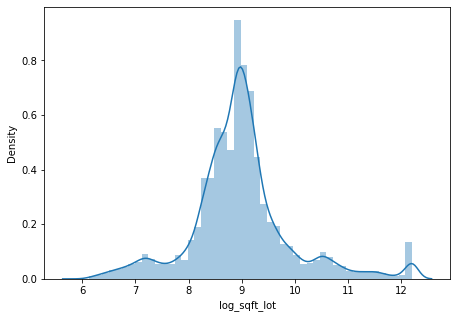

In [507]:
x_log = np.log(df['sqft_lot'])
x_log.name = "log_sqft_lot"

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(x_log)

Text(0.5, 1.0, 'Linear Relationship Residual Plot')

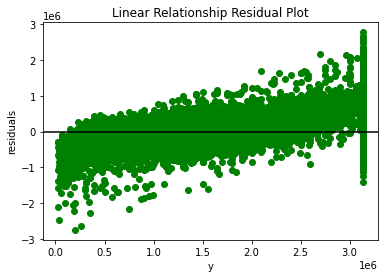

In [1149]:
## Initial Model evaluation

fig, ax = plt.subplots()
ax.scatter(y, sqft_log_results.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot")

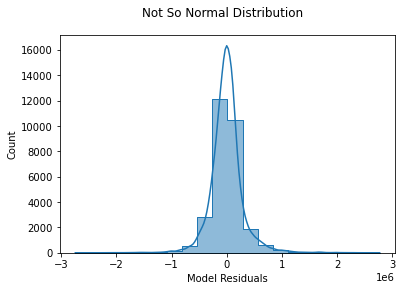

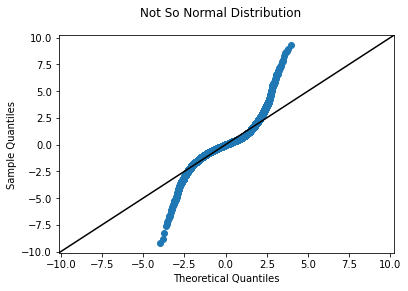

In [1151]:
fig, ax = plt.subplots()
sns.histplot(sqft_log_results.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("Not So Normal Distribution");

fig, ax = plt.subplots()
sm.graphics.qqplot(sqft_log_results.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
line = ax.lines[1]
line.set_color("black")
fig.suptitle("Not So Normal Distribution");

<AxesSubplot:xlabel='log_SalePrice', ylabel='Density'>

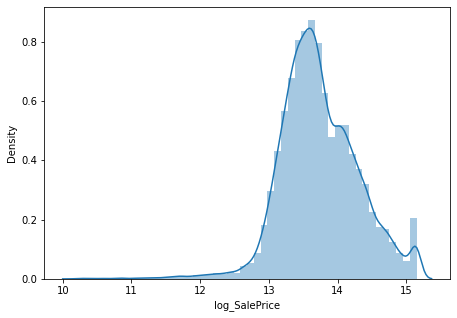

In [506]:
y_log = np.log(df['price'])
y_log.name = "log_SalePrice"
y_log

x_log = np.log(df['sqft_lot'])
x_log.name = "log_sqft_lot"

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(y_log)

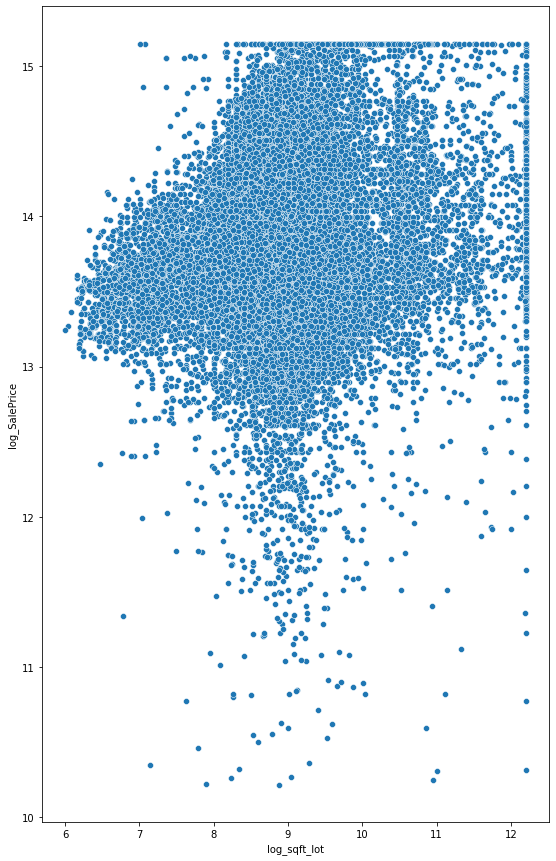

In [508]:
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
sns.scatterplot(x=x_log, y=y_log);

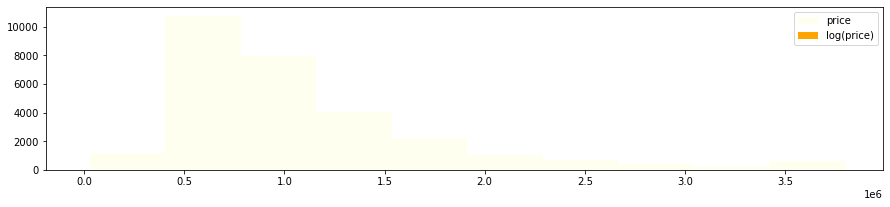

In [509]:
fig, ax = plt.subplots(figsize=(15,3))
ax.hist(y, label="price", color="ivory")
ax.hist(y_log, color="orange", label="log(price)")
ax.legend();

Cant even see the log scaled distribution.  

In [ ]:
# df.select_dtypes('number')

In [ ]:
y_log_model = sm.OLS(y_log, sm.add_constant(x_sqft_log))
y_log_results = y_log_model.fit()

print(y_log_results.summary())

In [ ]:
mean_absolute_error(y_log, sqft_log_results.predict(sm.add_constant(x_sqft_log)))

In [ ]:
mean_squared_error(y_log, sqft_log_results.predict(sm.add_constant(x_sqft_log)), squared=False)

Its very interesting.  The 

In [ ]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.plot.scatter(x='bathrooms', y='price', ax=ax1)
df.plot.scatter(x='bedrooms', y='price', ax=ax2)

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(X1['sqft_living'])
plt.subplot(1,2,2)
sns.distplot(X1['bathrooms'])

In [ ]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.sns.scatterplot(x='sqft_lot', y='price', data=X1)
df.sns.scatterplo(x='floors', y='price', ax=X1)

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['sqft_lot'])
plt.subplot(1,2,2)
sns.distplot(df['floors'])

## Continuous numerice predictors

In [ ]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.plot.scatter(x='sqft_above', y='price', ax=ax1)
df.plot.scatter(x='sqft_garage', y='price', ax=ax2)

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['sqft_above'])
plt.subplot(1,2,2)
sns.distplot(df['sqft_garage'])

In [ ]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.plot.scatter(x='yr_built', y='price', ax=ax1)
df.plot.scatter(x='yr_renovated', y='price', ax=ax2)

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['yr_built'])
plt.subplot(1,2,2)
sns.distplot(df['yr_renovated'])

In [ ]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.plot.scatter(x='sqft_basement', y='price', ax=ax1)
df.plot.scatter(x='sqft_patio', y='price', ax=ax2)

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['sqft_patio'])
plt.subplot(1,2,2)
sns.distplot(df['sqft_basement'])

There is some real symetry in the grade category.  As the grade increases, it appears that the average price of homes increases as well.  Good views and waterfront properties also seem correlated positively with price, which is understandable.  

In [ ]:
# cats3 = ['nuisance', 'sewer_system', 'greenbelt']
# fig, axes = plt.subplots(ncols=len(cats3), figsize=(12,5))
# for index, feature in enumerate(cats3):
#     df1.groupby(feature).mean().sort_values(by='price', ascending=False).plot.bar(
#         y='price', ax=axes[index])

Not much can be gleaned from these bar charts.  

In [ ]:
# plt.scatter(df1.sewer_system, df1.price)

In [ ]:
# plt.scatter(df1.greenbelt, df1.price)

In [ ]:
# fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
# df1.sort_values(by='price', ascending=False).plot.scatter(x='condition', y='price', ax=ax1)
# df1.sort_values(by='price', ascending=False).plot.scatter(x='view', y='price', ax=ax2)

In [ ]:
# fig, (ax) = plt.subplots (ncols=1, figsize = (15, 10))
# df1.sort_values(by='price', ascending=False).plot.scatter(x='grade', y='price', ax=ax)

The explained variance is higher, but the MAE is worse than our baseline model.  This model is now off by about $359,121.21 for any given prediction.  We will need to adjust the model.  We will attempt some partial regressions below to see what stands out.   

## Partial regression of Grade, sqft_living, and waterfront

In [ ]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    results, 
    exog_idx=list(X.columns),
    grid=(2,7),
    fig=fig)
plt.tight_layout()
plt.show()

## Model and partial of Sqft Living, Waterfront, and View

In [ ]:
# fig = plt.figure(figsize=(15,8))
# sm.graphics.plot_partregress_grid(
#     results, 
#     exog_idx=list(X_iter2.columns),
#     grid=(2,7),
#     fig=fig)
# plt.tight_layout()
# plt.show()

While I feel strongly about sqft living, I am beginning to think view does not have much impact on price as we predicted.  Perhaps the relationship can be better explained by a term or some transformation.  

# Neighborhood

In [ ]:
# Neigh = ['Neighborhood']
# fig, ax = plt.subplots(ncols=len(Neigh), figsize=(12,5))
# for index, feature in enumerate(Neigh):
#     df1.groupby(feature).mean().sort_values(by='price', ascending=False).plot.bar(
#         y='price', ax=ax)


Neighborhood really seems to explain a great deal about the variance in price, and it reduced our MAE down from our baseline.  Our predictions are now around $313,516.77 off by any given predictor.    

In [ ]:
# fig = plt.figure(figsize=(30,220))
# sm.graphics.plot_partregress_grid(
#     iter_results, 
#     exog_idx=list(X_iter.columns),
#     grid=(14,15),
#     fig=fig)
# plt.tight_layout()
# plt.show()

In [ ]:
# X_iter_Neigh

In [ ]:
# fig = plt.figure(figsize=(275,475))
# sm.graphics.plot_partregress_grid(
#     results, 
#     exog_idx=list(X_iter_Neigh.columns),
#     grid=(16,16),
#     fig=fig)
# plt.tight_layout()
# plt.show()

## Log 

In [ ]:
# X_log = df['sqft_lot']

# fig, ax = plt.subplots(ncols=2, figsize=(8,10))

# ax = ax
# left_ax.scatter(, y, alpha=0.5)
# left_ax.set_xlabel("sqft_lot")
# left_ax.set_ylabel("price")
    
# # Plot log transformed version
# right_ax = ax
# right_ax.scatter(np.log(X_log), np.log(y), alpha=0.5)
# right_ax.set_xlabel("log sqft_lot")
# right_ax.set_ylabel("log price")
    
# fig.suptitle("Raw vs. Log Transformed")

# fig.tight_layout()

In [ ]:
X_log = X[candidates].copy()

X_log.describe()

In [ ]:
for column in X_log.columns:
    X_log[f"log_{column}"] = np.log(X_log[column])
    X_log.drop(column, axis=1, inplace=True)
    
X_log

In [ ]:
y_log = np.log(y)
y_log.name = "log_SalePrice"
y_log

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(y_log)

In [ ]:
model_1 = sm.OLS(y_log, sm.add_constant(X_log))
results2 = model_1.fit()
results2.summary()

Drop columns not correlated.  per gp 9-19.  

In [ ]:
# plt.hist(df1.price)

In [ ]:
# sns.distplot(df1.price, bins=30, kde=True)

## Cleaning data

ccpr function partial 

Took the above code from https://www.datasklr.com/ols-least-squares-regression/variable-selection. 

### Final Model

# section_3

 [section_1](#section_1)


[section_2](#section_2)

## Regression Results

## Level Up: Project Enhancements

After completing the minimum project requirements, you could consider the following enhancements if you have time:

* Consider applying a linear or non-linear transformation to your features and/or target
* Investigate the linear regression assumptions for your final model
* Identify and remove outliers, then redo the analysis
* Compile the data cleaning code into a function

## terms and transformations

Attempted to use GeoPandas and plotly. 

## Conclusion

## Findings and Conclusions
Results from log transformation were marginally successful, pushing adjusted R-squared from 77.4 percent to 77.7 percent.  In addition, RMSE and MAE both fell to new lows.  Notably, these scores may not be a useful comparison with the baseline model, as it may be like comparing apples and oranges, but it does seem to 

The most signficant increases in model performance were obtained through the engineering of geographic features. To a lesser extent, but still very impactful, was the removal of outliers beyond three standard deviations for our numerical predictors, which greatly improved performance. Finally, modest gains in performance were achieved through log transformations of the target and `sqft_lot`. If more time permitted, further transformations might have reduced errors and improved performance further.  

Prior to the log transformations, an adjusted R-squared of 77.4 of variance was explained by our final model. 
This R-squared number was achieved together with a MAE of 208985.34 and RMSE of 323949.93, with nearly 125 variables. 
Categorical variables that were not statistically significant were left in the final model, but their coefficients were not interpreted.  When said variables were removed from the model, R-squared went down and MAE/RMSE levels rose, thus they proved necessary for the model as constructed.  In addition, while `sqft_living` was highly correlated with both `sqft_above` and `bathrooms`, the elimination of any of the variables caused the performance of the model to go down while simultaneously causing an increase in errors.  